In [1]:
#%load_ext autoreload
#%autoreload 2

In [1]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
import scanpy as sc

In [3]:
import scanpy as sc
import numpy as np
import moscot
from moscot.problems.time import TemporalProblem

In [4]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_multiVI_embedding.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 16918 × 200535
    obs: 'batch_id', 'modality', '_scvi_batch', 'celltype', 'sample'
    var: 'n_cells', 'feature_type'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'multi_vi', 'neighbors', 'sample_colors', 'umap'
    obsm: 'X_multi_vi', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances', 'multi_vi_connectivities', 'multi_vi_distances'

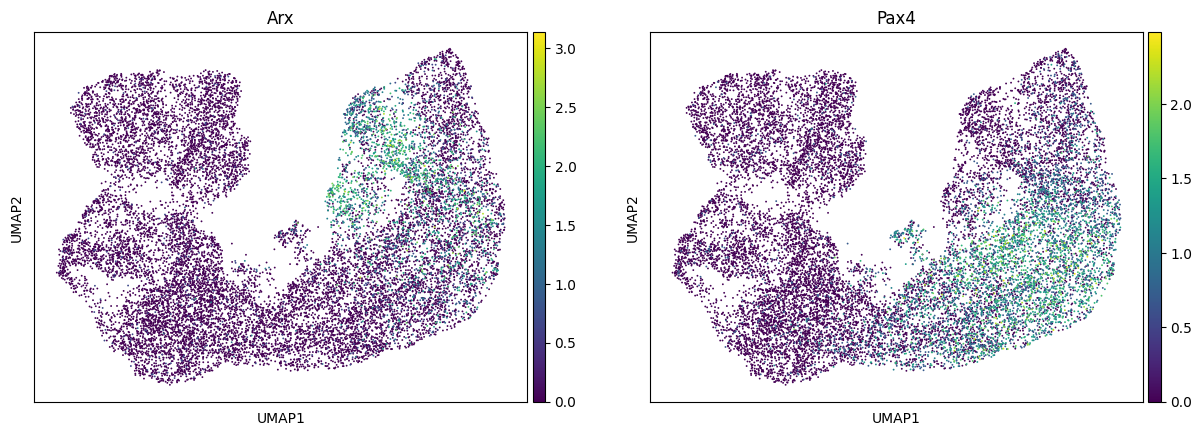

In [7]:
sc.pl.umap(adata, color=["Arx", "Pax4"])

In [6]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

# MultiVI space

In [7]:
tp0 = TemporalProblem(adata)
#tp0 = tp0.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse")
tp0 = tp0.prepare("time", joint_attr="X_multi_vi")

In [8]:
tp0 = tp0.solve(epsilon=1e-2, scale_cost="mean")

In [9]:
ct_desc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=True)

In [10]:
tp0[14.5, 15.5].solution

OTTOutput[shape=(9811, 7107), cost=0.2761, converged=True]

In [11]:
import moscot.plotting as mpl

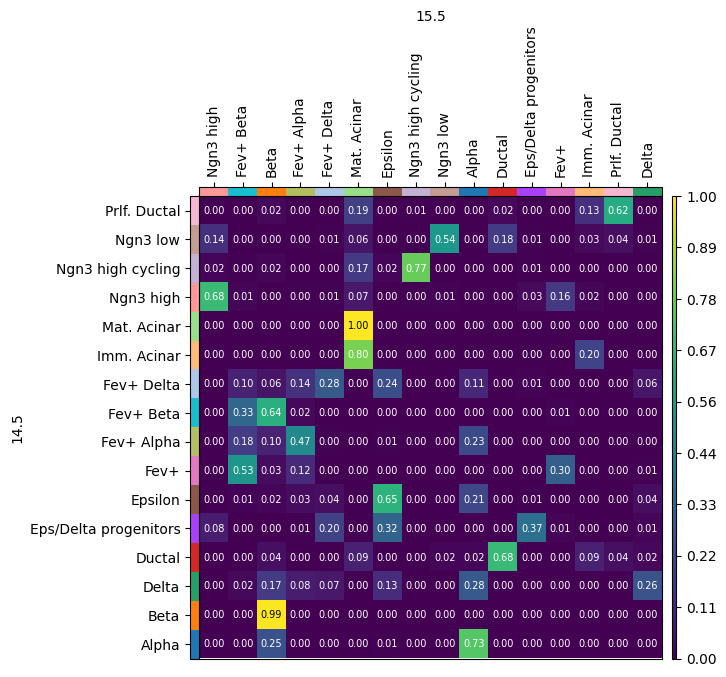

In [13]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)

In [14]:
ct_anc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=False)

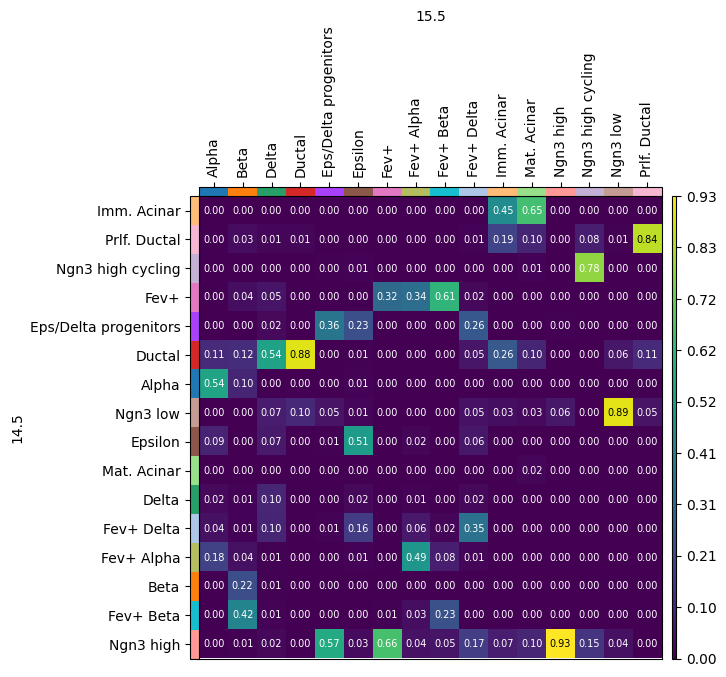

In [15]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)

In [16]:
tp0.push(14.5, 15.5, data="celltype", subset="Fev+ Alpha")

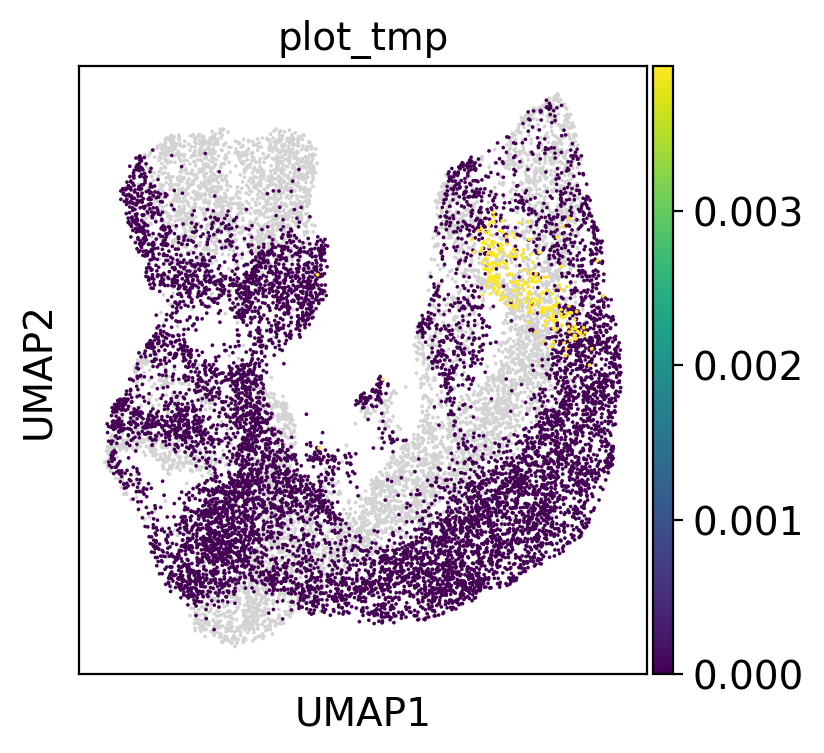

In [17]:
mpl.push(tp0, time_points=[14.5])

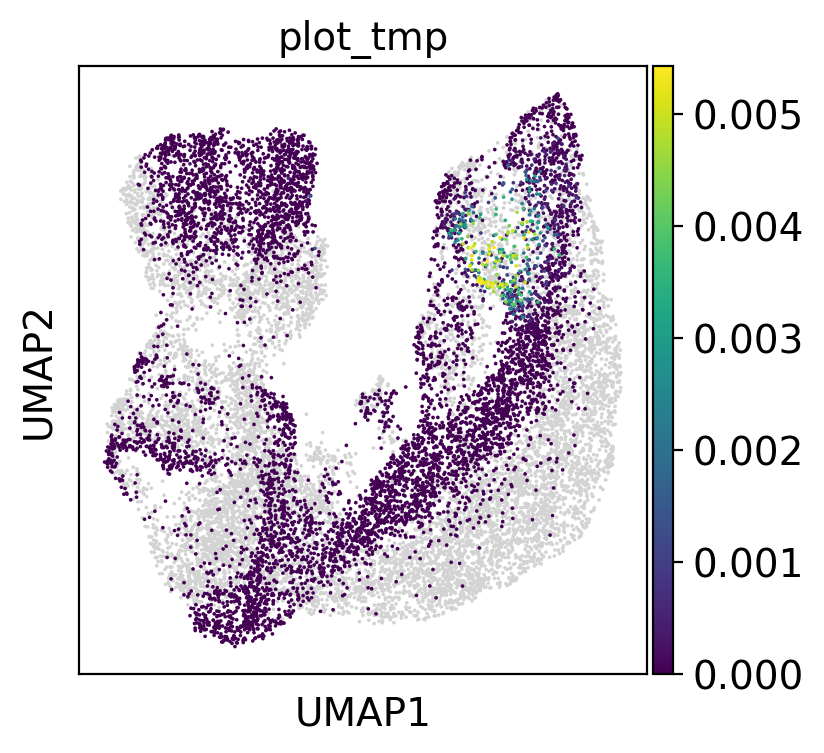

In [18]:
mpl.push(tp0, time_points=[15.5])

In [19]:
tp0.push(14.5, 15.5, data="celltype", subset="Eps/Delta progenitors")

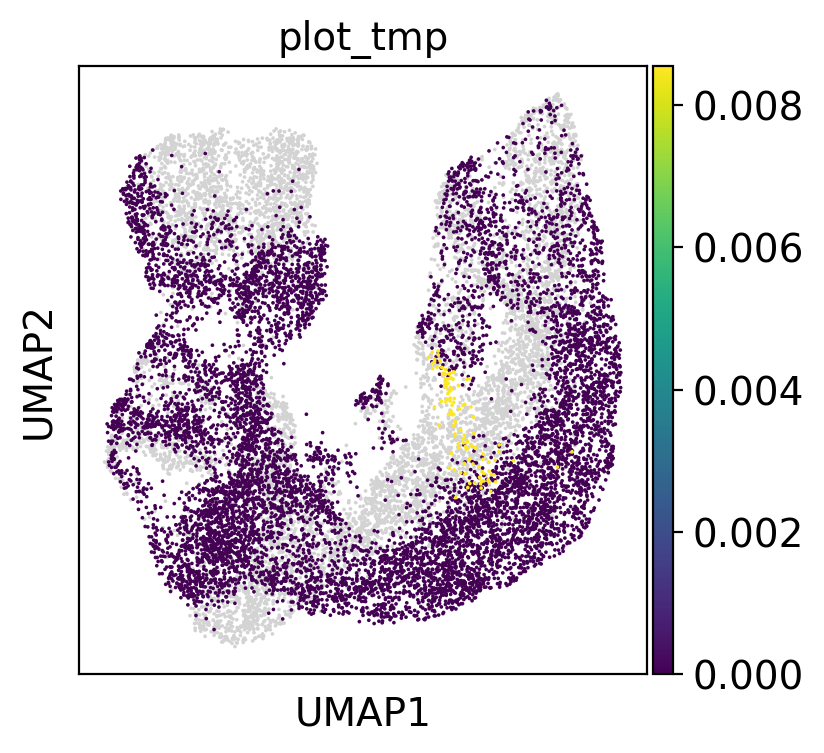

In [20]:
mpl.push(tp0, time_points=[14.5])

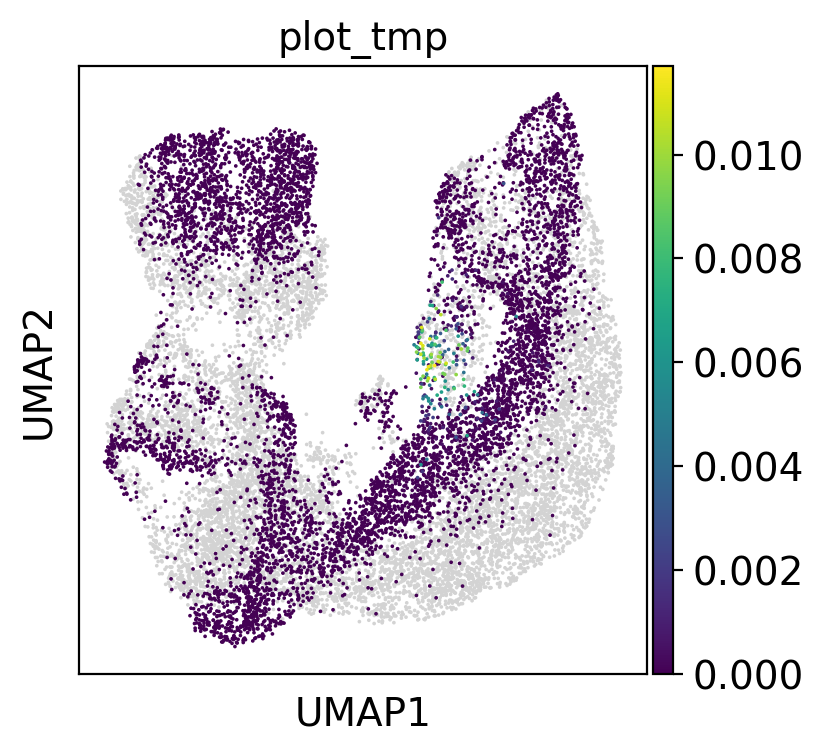

In [21]:
mpl.push(tp0, time_points=[15.5])

In [22]:
tp0.pull(14.5, 15.5, data="celltype", subset="Eps/Delta progenitors")

In [23]:
mpl.pull(tp0, time_points=[14.5])

KeyError: 'pull'